In [ ]:
#/srv/data/dicoms/Valdecilla_dicoms
#!nvidia-smi 

In [ ]:
'''#CSV PACIENTES CON HEMORRAGIA
from zipfile import ZipFile
PATH='/home/jovyan/'
for folder in ['GEBUENO','FUJIBUENO']: 
    zf = ZipFile(PATH+'COVID/DATA/ZIP/'+folder+'.zip', 'r')
    zf.extractall(PATH+'COVID/DATA/DICOM/')
    zf.close()'''

In [2]:
import os
def directory(path,extension): 
    count = 0 
    list_dir = [] 
    for p in ['covid','control']:
        path=path+'/'+p
        list_dir = os.listdir(path) 
        for file in list_dir: 
            if file.endswith(extension): # eg: '.txt' 
                count += 1 
        return count

path='/home/jovyan/COVID/DATA/PNG_NYP_PABLO_CROPPED/'
carestream='CARESTREAM_HSLL/'
fujihsll='FUJI_HSLL/'
fujihumv='FUJI_HUMV/'
ge='GE_HSLL/'


n_carestream=directory(path+carestream,'.png')

n_fujihsll=directory(path+fujihsll,'.png')
n_fujihumv=directory(path+fujihumv,'.png')
n_ge=directory(path+ge,'.png')

print('CARESTREAM_HSLL: '+ str(n_carestream) + ' - FUJI_HSLL: '+ str(n_fujihsll) +' - FUJI_HUMV: '+str(n_fujihumv) +' - GE_HSLL: '+ str(n_ge))



path='/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_HOG_CROPPED/FUJI_HUMV/'
TEST_PATH='test'
TRAIN_PATH='train'

n_fujihumv_TEST=directory(path+TEST_PATH,'.png')
n_fujihumv_TRAIN=directory(path+TRAIN_PATH,'.png')

print('TEST FUJI_HUMV: '+str(n_fujihumv_TEST) +' - TRAIN FUJI_HUMV: '+ str(n_fujihumv_TRAIN))

CARESTREAM_HSLL: 22 - FUJI_HSLL: 122 - FUJI_HUMV: 200 - GE_HSLL: 96
TEST FUJI_HUMV: 51 - TRAIN FUJI_HUMV: 149


In [ ]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

def hist(stack, PATH='/home/jovyan/COVID/DATA/JPG/'): 
    plt.hist(stack.flatten(), bins=80)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.savefig(PATH)
    plt.show()
    
for timage in ['FUJI_HUMV','FUJI_HSLL','GE_HSLL','CARESTREAM_HSLL']:
    
    d_path="/home/jovyan/COVID/DATA/PNG_NPY_PABLO/"+timage+'/'
    if not os.path.exists(d_path):
        print("The folder doesn't exist")
        print("Making new folder in the path: " + d_path)
        os.makedirs(d_path) 
        
    h_path="/home/jovyan/COVID/DATA/HISTOGRAMS_PNG_NPY_PABLO/"+timage+'/'
    if not os.path.exists(h_path):
        print("The folder doesn't exist")
        print("Making new folder in the path: " + h_path)
        os.makedirs(h_path)  
        
        
    for icovid_control in ['control','covid']:
        
        d_path="/home/jovyan/COVID/DATA/PNG_NPY_PABLO/"+timage+'/'+icovid_control+'/'
        if not os.path.exists(d_path):
            print("The folder doesn't exist")
            print("Making new folder in the path: " + d_path)
            os.makedirs(d_path)            
                
        h_path="/home/jovyan/COVID/DATA/HISTOGRAMS_PNG_NPY_PABLO/"+timage+'/'+icovid_control+'/'
        if not os.path.exists(h_path):
            print("The folder doesn't exist")
            print("Making new folder in the path: " + h_path)
            os.makedirs(h_path)
            
        path = "/home/jovyan/recovery/PabloM/Generalization/images/"+timage+"/transformed_images/"+icovid_control+"/"
        files = os.listdir(str(path))
        
        if '.ipynb_checkpoints' in files:
            files.remove('.ipynb_checkpoints')

        for ifiles in files:
            
            VOLUME=np.load(path+ifiles)
            VOLUME = Image.fromarray(np.uint8(VOLUME*255))
            hist(np.array(VOLUME), PATH=h_path+ifiles.split('.')[0]+'.jpg')
            VOLUME.save(d_path+ifiles.split('.')[0]+'.png')        

In [10]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import cv2


def normalize(image):
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    
    image[image>1] = 0. #quitar información
    image[image<0] = 0.
    return image

def cut_image_resize(pixel_array_windowed, c_path, image_size=512, p=0.15):
    #n_size, m_size = pixel_array_windowed.shape
    n_size, m_size = pixel_array_windowed.size
    
    #CUT
    pixel_array_windowed = pixel_array_windowed.crop((int(np.round(m_size*p)), int(np.round(n_size*p)), m_size-int(np.round(m_size*p)), n_size-int(np.round(n_size*p))))
    
    #pixel_array_cut=pixel_array_windowed[int(np.round(n_size*p)):n_size-int(np.round(n_size*p)), int(np.round(m_size*p)):m_size-int(np.round(m_size*p))]
    
    #RESIZE
    pixel_array_resized = pixel_array_windowed.resize((512,512))
    #pixel_array_resized=cv2.resize(pixel_array_cut,(image_size,image_size), interpolation=cv2.INTER_CUBIC) 
    
    
    #pixel_array_resized /= np.max(pixel_array_resized)
    pixel_array_resized = normalize(pixel_array_resized)
    pixel_array_resized = Image.fromarray(np.uint8(pixel_array_resized*255))
        
    pixel_array_resized.save(c_path+ifiles.split('.')[0]+'.png')
    
    return pixel_array_resized


for timage in ['FUJI_HSLL']: #,'FUJI_HSLL','GE_HSLL','CARESTREAM_HSLL', 'FUJI_HUMV'
        
    c_path="/home/jovyan/COVID/DATA/PNG_NYP_PABLO_CROPPED/"+timage+'/'
    #print(c_path)
    if not os.path.exists(c_path):
        print("The folder doesn't exist")
        print("Making new folder in the path: " + c_path)
        os.makedirs(c_path) 
        
    for icovid_control in ['control','covid']:#
        c_path="/home/jovyan/COVID/DATA/PNG_NYP_PABLO_CROPPED/"+timage+'/'+icovid_control+'/'
        #print(c_path)
        if not os.path.exists(c_path):
            print("The folder doesn't exist")
            print("Making new folder in the path: " + c_path)
            os.makedirs(c_path) 

        path = "/home/jovyan/COVID/DATA/PNG_NPY_PABLO/"+timage+"/"+icovid_control+"/"
        files = os.listdir(str(path))
            
        #print(files)

        if '.ipynb_checkpoints' in files:
            files.remove('.ipynb_checkpoints')

        for ifiles in files:
            #print(ifiles)
            VOLUME = Image.open(path+ifiles.split('.')[0]+'.png')
            VOLUME = cut_image_resize(VOLUME, c_path, image_size=512, p=0.15)
            #VOLUME.show()

The folder doesn't exist
Making new folder in the path: /home/jovyan/COVID/DATA/PNG_NYP_PABLO_CROPPED/FUJI_HSLL/covid/


In [30]:
import pandas as pd
path='/home/jovyan/COVID/DATA/PNG_NPY_PABLO/FUJI_HUMV/'
list_path, label = [], []

for classe in ['covid','control']:
    list_files = os.listdir(path + classe + '/')
    if '.ipynb_checkpoints' in list_files:
        list_files.remove('.ipynb_checkpoints')
        
    for ifile in list_files:

        list_path.append(path + classe+'/'+ifile)
        label.append(classe)



data = {'Name': list_path,
        'Label': label}

df = pd.DataFrame(data, columns = ['Name','Label']) 
'''df = df.iloc[np.random.permutation(len(df))]
df = df.astype(str)'''
df.to_csv('/home/jovyan/COVID/DATA/CSV_PNG_NPY_PABLO/FUJI_HUMV_name_label.csv')

In [35]:
from sklearn.model_selection import train_test_split
test_split=0.25

train_df, test_df = train_test_split(df, test_size=test_split)

print('[INFO] TRAIN CSV ',train_df.shape)
print('[INFO] TEST CSV ',test_df.shape)

train_df.to_csv('/home/jovyan/COVID/DATA/CSV_PNG_NPY_PABLO/TRAIN_FUJI_HUMV_name_label.csv')
test_df.to_csv('/home/jovyan/COVID/DATA/CSV_PNG_NPY_PABLO/VAL_FUJI_HUMV_name_label.csv')

[INFO] TRAIN CSV  (381, 2)
[INFO] TEST CSV  (128, 2)


In [6]:
import shutil
import pandas as pd
import os

train_df = pd.read_csv('/home/jovyan/COVID/DATA/CSV_PNG_NPY_PABLO/TRAIN_FUJI_HUMV_name_label.csv')

for t in train_df['Name']:
    
    b=t.split('/')
    if not os.path.exists('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_HOG_CROPPED/FUJI_HUMV/train/'):
        os.mkdir('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_HOG_CROPPED/FUJI_HUMV/train/')
    #if not os.path.exists('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_NPY/train/'):
    #    os.mkdir('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_NPY/train/')
        
    if not os.path.exists('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_HOG_CROPPED/FUJI_HUMV/train/'+b[-2]+'/'):
        os.mkdir('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_HOG_CROPPED/FUJI_HUMV/train/'+b[-2]+'/')
    #if not os.path.exists('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_NPY/train/'+b[-2]+'/'):
    #    os.mkdir('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_NPY/train/'+b[-2]+'/')
    
    
    shutil.copy('/home/jovyan/COVID/DATA/HOG/FUJI_HUMV/orientations6_pixels_per_cell2_cells_per_block1/'+b[-2]+'/'+b[-1], '/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_HOG_CROPPED/FUJI_HUMV/train/'+b[-2]+'/'+ b[-1])
    #shutil.copy("/home/jovyan/recovery/PabloM/Generalization/images/FUJI_HUMV/transformed_images/"+b[-2]+'/'+ b[-1].split('.')[0]+'.npy', '/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_NPY/train/'+b[-2]+'/'+b[-1].split('.')[0]+'.npy')
      
test_df = pd.read_csv('/home/jovyan/COVID/DATA/CSV_PNG_NPY_PABLO/VAL_FUJI_HUMV_name_label.csv')
for t in test_df['Name']:
    b=t.split('/')
    if not os.path.exists('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_HOG_CROPPED/FUJI_HUMV/test/'):
        os.mkdir('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_HOG_CROPPED/FUJI_HUMV/test/')
    #if not os.path.exists('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_NPY/test/'):
    #    os.mkdir('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_NPY/test/')
        
    if not os.path.exists('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_HOG_CROPPED/FUJI_HUMV/test/'+b[-2]+'/'):
        os.mkdir('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_HOG_CROPPED/FUJI_HUMV/test/'+b[-2]+'/')
    #if not os.path.exists('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_NPY/test/'+b[-2]+'/'):
    #    os.mkdir('/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_NPY/test/'+b[-2]+'/')
    
    shutil.copy('/home/jovyan/COVID/DATA/HOG/FUJI_HUMV/orientations6_pixels_per_cell2_cells_per_block1/'+b[-2]+'/'+b[-1], '/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_HOG_CROPPED/FUJI_HUMV/test/'+b[-2]+'/'+ b[-1]) 

    #shutil.copy(t, '/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_IMAGE/test/'+b[-2]+'/'+ b[-1])
    #shutil.copy("/home/jovyan/recovery/PabloM/Generalization/images/FUJI_HUMV/transformed_images/"+b[-2]+'/'+ b[-1].split('.')[0]+'.npy', '/home/jovyan/COVID/DATA/TRAIN_TEST/TRAIN_DATASET_NPY/test/'+b[-2]+'/'+b[-1].split('.')[0]+'.npy')


In [48]:
print('TRAIN ')
train_df.count()
print(train_df.groupby('Label').count())

print('\n TEST ')
test_df.count()
print(test_df.groupby('Label').count())

TRAIN 
         Name
Label        
control   232
covid     149

 TEST 
         Name
Label        
control    77
covid      51


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import shutil
import os
#!pip install pydicom
import pydicom as pydicom
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#!pip install six
#!pip install opencv-python

import cv2
from scipy import ndimage   #Multidimensional image processing

In [69]:
############################################# 
#.........FUNCIONES PREPROCESADO.............
#############################################
#source: https://www.kaggle.com/sentdex/first-pass-through-data-w-3d-convnet/

#FUNCIONES NECESARIAS PARA DICOM / PREPROCESADO DE LA IMAGEN:
from pydicom import dcmread
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file


# VISUALIZAR CORTES
def showimg(stack, PATH='/home/jovyan/COVID/DATA/JPG/'):        
    stack.save(PATH)
    
# VISUALIZAR HISTOGRAMAS
def hist(stack, PATH='/home/jovyan/COVID/DATA/JPG/'): 
    plt.hist(stack.flatten(), bins=80)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.savefig(PATH)

    
def extraerdatos(slices):
    pid.append(slices.PatientID)
    mf.append(slices.Manufacturer)
    ps.append(slices.PatientSex)
    #pa.append(slices.PatientAge)
    #st.append(slices.SliceThickness)
    iname.append(slices.InstitutionName)
    
    #(0010, 0040) Patient's Sex                       CS: 'M'
    #(0010, 1010) Patient's Age                       AS: '060Y'
    #print('PatientID: '+str(nid[-1]) +' - Equipo: '+str(ne[-1]), '- PatientSex: '+str(ps[-1]))#- PatientAge: '+str(pa[-1])
    
    
def resta_consecutivos(a):
    b=[]
    for i in range(len(a)-1):
        b.append(a[i+1]-a[i])
    return np.array(b)

def load_scan(path):
    img= dcmread('/home/jovyan/COVID/DATA/DICOM/'+manufacturer+'/'+classe+'/'+ifile)
    imagen = img.pixel_array
    extraerdatos(img)

    print('[INFO] PATIENT ID', img.PatientID)
    largest_image_pixel_value=np.power(2,img.BitsStored)

    if manufacturer == 'FUJI':
        imagen = largest_image_pixel_value - imagen

    img.WindowCenter= largest_image_pixel_value/2
    img.WindowWidth= largest_image_pixel_value
    pixel_array_windowed=pydicom.pixel_data_handlers.apply_windowing(imagen, img)
    
    return pixel_array_windowed
    
def cut_image_resize(pixel_array_windowed, cut_size=200, image_size=512, p=0.15):
    n_size,m_size=pixel_array_windowed.shape
    #CUT
    pixel_array_cut=pixel_array_windowed[int(np.round(n_size*p)):n_size-int(np.round(n_size*p)), int(np.round(m_size*p)):m_size-int(np.round(m_size*p))]
    #RESIZE
    pixel_array_resized=cv2.resize(pixel_array_cut,(image_size,image_size), interpolation=cv2.INTER_CUBIC) 
    return pixel_array_resized

def normalizacion(pixel_array_resized):
    #NORMALIZACIÓN
    pixel_array_normalized = (pixel_array_resized - np.min(pixel_array_resized)) / (np.max(pixel_array_resized) - np.min(pixel_array_resized))
    #pixel_array_normalized=pixel_array_resized/np.max(pixel_array_resized)    
    return pixel_array_normalized

def remove_letter(pixel_array_normalized):
    #VER SI HAY LETRAS
    unique = np.unique(pixel_array_normalized)    
    restas=resta_consecutivos(unique[-200:])
    if len(restas[restas>=0.15])>=1:
        #QUITAR LAS LETRAS
        ind_value = np.where(pixel_array_normalized==np.max(pixel_array_normalized))
        pixel_array_normalized[pixel_array_normalized>=np.max(pixel_array_normalized)-0.30] = pixel_array_normalized[int(ind_value[0])+5,int(ind_value[1])-5]
        pixel_array_normalized=pixel_array_normalized/np.max(pixel_array_normalized)

def save_images_histograms(pixel_array_normalized, manufacturer, classes, name):
    
    path_list.append('/home/jovyan/COVID/DATA/JPG/' +  manufacturer+'/ALLIMAGES/'+ name  + '.jpg')
    
    pixels_n=Image.fromarray((pixel_array_normalized * 255).astype(np.uint8))
    #pixels_n.save('/home/jovyan/COVID/DATA/JPG/' +  manufacturer+'/'+classes +'/'+ name  + '.jpg')
    #pixels_n.save('/home/jovyan/COVID/DATA/JPG/' +  manufacturer+'/ALLIMAGES/'+ name  + '.jpg')
    
    
    showimg(pixels_n, PATH='/home/jovyan/COVID/DATA/JPG/' +  manufacturer+'/'+classes +'/'+ name  + '.jpg')
    showimg(pixels_n, PATH='/home/jovyan/COVID/DATA/JPG/' +  manufacturer+'/ALLIMAGES/'+ name  + '.jpg')
    
    hist(np.asarray(pixels_n), PATH='/home/jovyan/COVID/DATA/HISTOGRAMS/' + manufacturer+'/'+classes +'/'+ name  + '.jpg')
    
    #pixel_array_rgb=np.stack([pixel_array_normalized, pixel_array_normalized, pixel_array_normalized],axis=-1)   #RGB
    #np.save('/home/jovyan/COVID/DATA/NPY/' +  manufacturer+'/'+classes +'/'+ name  + '.npy', pixel_array_rgb) 

[INFO] PATIENT ID 4015504


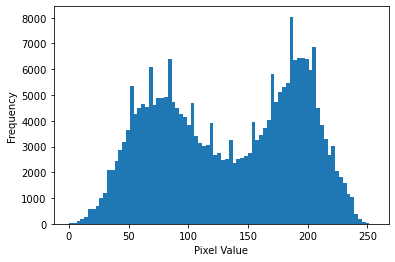

In [68]:
from IPython.display import display
import pydicom as pydicom
from pydicom import dcmread

manufacturer='GE'
from PIL import Image
img= dcmread('/home/jovyan/COVID/DATA/DICOM/GE/COVID/1.2.840.113619.2.67.2203815182.11045200317102119.10003_168969_000001_1607438409000e.dcm')
imagen = img.pixel_array      

print('[INFO] PATIENT ID', img.PatientID)
largest_image_pixel_value=np.power(2,img.BitsStored)

if manufacturer == 'FUJI':
    imagen = largest_image_pixel_value - imagen
    
img.WindowCenter= largest_image_pixel_value/2
img.WindowWidth= largest_image_pixel_value
pixel_array_windowed=pydicom.pixel_data_handlers.apply_windowing(imagen, img)

pixel_array_resized = cut_image_resize(pixel_array_windowed, p=0.15)
pixel_array_normalized = normalizacion(pixel_array_resized)    
    
save_images_histograms(pixel_array_normalized, manufacturer, classe, str(pid[-1]))

In [ ]:
path='/home/jovyan/COVID/DATA/DICOM/'

for manufacturer in ['FUJI', 'GE']:
    pid, mf, ps, iname, label, path_list= [], [], [], [], [], []
    
    for classe in ['COVID','CONTROL']:
        
        list_files = os.listdir(path + manufacturer + '/' + classe + '/')
        
        for ifile in list_files:            
            pixel_array_windowed = load_scan(path + manufacturer + '/' + classe + '/')
            
            pixel_array_resized = cut_image_resize(pixel_array_windowed, p=0.15)
            
            pixel_array_normalized = normalizacion(pixel_array_resized)
            
            save_images_histograms(pixel_array_normalized, manufacturer, classe, str(pid[-1]))
        
            label.append(classe)


    data = {    'Path': path_list,
                'PatientID': pid,
                'Manufacturer': mf,
                'PatientSex':ps,
                'Diagnose': label}

    df = pd.DataFrame(data, columns = ['Path','PatientID', 'Manufacturer','PatientSex', 'Diagnose']) 
    df.to_csv('/home/jovyan/COVID/DATA/CSV/'+manufacturer+'_data.csv')

In [2]:
test_split=0.15
path='/home/jovyan/COVID/DATA/'

for manufacturer in ['FUJI','GE']:
    df = pd.read_csv(path+'CSV/'+manufacturer+'_data.csv')
    df = df.iloc[np.random.permutation(len(df))]
    df = df.astype(str)

    # split for testing
    train_df, test_df = train_test_split(df, test_size=test_split)

    print('[INFO] TRAIN CSV ',train_df.shape)
    print('[INFO] TEST CSV ',test_df.shape)
    
    train_df=train_df.drop(columns=['Unnamed: 0'])
    test_df=test_df.drop(columns=['Unnamed: 0'])
    train_df.to_csv(path+'CSV/TRAIN_'+manufacturer+'.csv')
    test_df.to_csv(path+'CSV/VAL_'+manufacturer+'.csv')

[INFO] TRAIN CSV  (657, 6)
[INFO] TEST CSV  (116, 6)
[INFO] TRAIN CSV  (204, 6)
[INFO] TEST CSV  (37, 6)


In [ ]:
test_split=0.20
SPLIT=5
#CREAR KFOLDS

# read data
# Assuming it has two cols:
# name: path to each image with its extension
# label: labels (here it is 0s and 1s) -> binary classification
df = pd.read_csv('/srv/data/csv/data_dicoms_Valdecilla.csv')
df = df.iloc[np.random.permutation(len(df))]
df = df.astype(str)

# split for testing
train_df, test_df = train_test_split(df, test_size=test_split)

print('[INFO] TRAIN CSV ',train_df.shape)
print('[INFO] TEST CSV ',test_df.shape)
train_df.to_csv('/srv/data/csv/TRAIN_Valdecilla.csv')
test_df.to_csv('/srv/data/csv/TEST_Valdecilla.csv')

#from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
Xtest = test_df['name']
ytest = test_df['label']

Xtrain = train_df['name']
ytrain = train_df['label']

from sklearn.model_selection import train_test_split
import shutil

train_x=[]
for t in Xtrain:
    b=t.split('/')
    if os.path.exists('/srv/data/train_test_labels_valdecilla/train/'+b[-2]+'/') is False:
        os.mkdir('/srv/data/train_test_labels_valdecilla/train/'+b[-2]+'/')
    shutil.copy(t, '/srv/data/train_test_labels_valdecilla/train/'+b[-2]+'/'+b[-1])
    train_x.append('/srv/data/train_test_labels_valdecilla/train/'+b[-2]+'/'+b[-1])
      
test_x=[]
for t in Xtest:
    b=t.split('/')
    if os.path.exists('/srv/data/train_test_labels_valdecilla/test/'+b[-2]+'/') is False:
        os.mkdir('/srv/data/train_test_labels_valdecilla/test/'+b[-2]+'/')
    shutil.copy(t, '/srv/data/train_test_labels_valdecilla/test/'+b[-2]+'/'+b[-1]) 
    test_x.append('/srv/data/train_test_labels_valdecilla/test/'+b[-2]+'/'+b[-1])
    
    
'''print("KFold, shuffle=False (default)")
kf = KFold(n_splits=SPLIT, random_state=True, shuffle=True)
i=1
X_train=[]
X_val=[]
y_train=[]
y_val=[]

for train_index, test_index in kf.split(Xtrain, ytrain):
    #print('TRAIN_'+str(i)+' :',train_index)
    #print('TEST_'+str(i)+' :', test_index)
    train_index=list(train_index)
    test_index=list(test_index)

    Xtrain = np.array(Xtrain)
    ytrain = np.array(ytrain)
    if(i is 1):
        X_train1 , X_val1 = Xtrain[train_index], Xtrain[test_index]
        y_train1, y_val1 = ytrain[train_index], ytrain[test_index]
        
        data = {'name': X_train1,
        'label': y_train1}
        dftrain1 = pd.DataFrame(data, columns = ['name', 'label']) 
        dftrain1.to_csv('/srv/data/csv/TRAIN'+str(i)+'_laredo.csv')
        
        data = {'name': X_val1,
        'label': y_val1}
        dfval1 = pd.DataFrame(data, columns = ['name', 'label']) 
        dfval1.to_csv('/srv/data/csv/VAL'+str(i)+'_laredo.csv')
        
        i=i+1
    elif(i is 2):
        X_train2 , X_val2 = Xtrain[train_index], Xtrain[test_index]
        y_train2, y_val2 = ytrain[train_index], ytrain[test_index]
        
        data = {'name': X_train2,
        'label': y_train2}
        dftrain2 = pd.DataFrame(data, columns = ['name', 'label']) 
        dftrain2.to_csv('/srv/data/csv/TRAIN'+str(i)+'_laredo.csv')
        
        data = {'name': X_val2,
        'label': y_val2}
        dfval2 = pd.DataFrame(data, columns = ['name', 'label']) 
        dfval2.to_csv('/srv/data/csv/VAL'+str(i)+'_laredo.csv')
        
        i=i+1
    elif(i is 3):
        X_train3 , X_val3 = Xtrain[train_index], Xtrain[test_index]
        y_train3, y_val3 = ytrain[train_index], ytrain[test_index]
        
        data = {'name': X_train3,
        'label': y_train3}
        dftrain3 = pd.DataFrame(data, columns = ['name', 'label']) 
        dftrain3.to_csv('/srv/data/csv/TRAIN'+str(i)+'_laredo.csv')
        
        data = {'name': X_val3,
        'label': y_val3}
        dfval3 = pd.DataFrame(data, columns = ['name', 'label']) 
        dfval3.to_csv('/srv/data/csv/VAL'+str(i)+'_laredo.csv')
        
        i=i+1
    elif(i is 4):
        X_train4 , X_val4 = Xtrain[train_index], Xtrain[test_index]
        y_train4, y_val4 = ytrain[train_index], ytrain[test_index]
        
        data = {'name': X_train4,
        'label': y_train4}
        dftrain4 = pd.DataFrame(data, columns = ['name', 'label']) 
        dftrain4.to_csv('/srv/data/csv/TRAIN'+str(i)+'_laredo.csv')
        
        data = {'name': X_val4,
        'label': y_val4}
        dfval4 = pd.DataFrame(data, columns = ['name', 'label']) 
        dfval4.to_csv('/srv/data/csv/VAL'+str(i)+'_laredo.csv')
        
        i=i+1
    elif(i is 5):
        X_train5 , X_val5 = Xtrain[train_index], Xtrain[test_index]
        y_train5, y_val5 = ytrain[train_index], ytrain[test_index]
        
        data = {'name': X_train5,
        'label': y_train5}
        dftrain5 = pd.DataFrame(data, columns = ['name', 'label']) 
        dftrain5.to_csv('/srv/data/csv/TRAIN'+str(i)+'_laredo.csv')
        
        data = {'name': X_val5,
        'label': y_val5}
        dfval5 = pd.DataFrame(data, columns = ['name', 'label']) 
        dfval5.to_csv('/srv/data/csv/VAL'+str(i)+'_laredo.csv')      
        i=i+1
        
#REVISAR KFOLDS HECHOS Y TAMAÑO   
print('\nTRAIN 1',dftrain1.shape)
print('VAL 1', dfval1.shape)

print('TRAIN 2',dftrain2.shape)
print('VAL 2',dfval2.shape)

print('TRAIN 3',dftrain3.shape)
print('VAL 3',dfval3.shape)

print('TRAIN 4',dftrain4.shape)
print('VAL 4',dfval4.shape)

print('TRAIN 5',dftrain5.shape)
print('VAL 5',dfval5.shape)'''

In [ ]:
tipodata=['train','test']
for tipo in tipodata:
    for dirpath, dirnames, fileList in os.walk('/srv/data/train_test_labels_valdecilla/'+tipo+'/'):
        for direc in dirnames:
            dir_final=dirpath+direc+'/'
            for dirpath1, dirnames1, fileList1 in os.walk(dir_final):
                for filecsv in fileList1:
                    
                    if os.path.exists('/srv/data/train_test_labels/train/'+direc+'/') is False:
                        os.mkdir('/srv/data/train_test_labels/train/'+direc+'/')
                    shutil.copy(dir_final+filecsv, '/srv/data/train_test_labels/train/'+direc+'/Valdecilla_'+filecsv)
                    
                    if os.path.exists('/srv/data/train_test_labels/test/'+direc+'/') is False:
                        os.mkdir('/srv/data/train_test_labels/test/'+direc+'/')
                    shutil.copy(dir_final+filecsv, '/srv/data/train_test_labels/test/'+direc+'/Valdecilla_'+filecsv)
                        
                    
                        
tipodata=['test','train']
for tipo in tipodata:
    for dirpath, dirnames, fileList in os.walk('/srv/data/train_test_labels_laredo/'+tipo+'/'):
        for direc in dirnames:
            dir_final=dirpath+direc+'/'
            for dirpath1, dirnames1, fileList1 in os.walk(dir_final):
                for filecsv in fileList1:
                    if os.path.exists('/srv/data/train_test_labels/train/'+direc+'/') is False:
                        os.mkdir('/srv/data/train_test_labels/train/'+direc+'/')
                    shutil.copy(dir_final+filecsv, '/srv/data/train_test_labels/train/'+direc+'/Laredo_'+filecsv)

                    if os.path.exists('/srv/data/train_test_labels/test/'+direc+'/') is False:
                        os.mkdir('/srv/data/train_test_labels/test/'+direc+'/')
                    shutil.copy(dir_final+filecsv, '/srv/data/train_test_labels/test/'+direc+'/Laredo_'+filecsv)

In [ ]:
from sklearn.model_selection import train_test_split
import shutil
df = pd.read_csv('/srv/data/csv/data_dicoms_LAREDO.csv')

train_x=[]
for t in Xtrain:
    b=t.split('/')
    if os.path.exists('/srv/data/train_test_labels_laredo/train/'+b[-2]+'/') is False:
        os.mkdir('/srv/data/train_test_labels_laredo/train/'+b[-2]+'/')
    shutil.copy(t, '/srv/data/train_test_labels_laredo/train/'+b[-2]+'/'+b[-1])
    train_x.append('/srv/data/train_test_labels_laredo/train/'+b[-2]+'/'+b[-1])
      
test_x=[]
for t in Xtest:
    b=t.split('/')
    if os.path.exists('/srv/data/train_test_labels_laredo/test/'+b[-2]+'/') is False:
        os.mkdir('/srv/data/train_test_labels_laredo/test/'+b[-2]+'/')
    shutil.copy(t, '/srv/data/train_test_labels_laredo/test/'+b[-2]+'/'+b[-1]) 
    test_x.append('/srv/data/train_test_labels_laredo/test/'+b[-2]+'/'+b[-1])
#CREAMOS LOS CSV

'''def crear_csv(train_list, label_list, name_csv, data=[]):
    if name_csv is not 'TRAIN':
        train_list=np.transpose(train_list)
        label_list=np.transpose(label_list)

        data = {'name': train_list,
                'label': label_list}
    df = pd.DataFrame(data, columns = ['name', 'label']) 
    df = df.iloc[np.random.permutation(len(df))]
    df = df.astype(str)
    df.to_csv(csv_path+name_csv+'.csv') 
    
crear_csv(train_x, ytrain, 'csv_train')
crear_csv(test_x, ytest, 'csv_test')'''

In [ ]:
from sklearn.model_selection import train_test_split
import shutil
train_x=[]
for t in X_train:
    b=t.split('/')
    if os.path.exists('/srv/data/train_test_labels/train/'+b[-2]+'/') is False:
        os.mkdir('/srv/data/train_test_labels/train/'+b[-2]+'/')
    shutil.copy(t, '/srv/data/train_test_labels/train/'+b[-2]+'/'+b[-1])
    train_x.append('/srv/data/train_test_labels/train/'+b[-2]+'/'+b[-1])
      
test_x=[]
for t in X_test:
    b=t.split('/')
    if os.path.exists('/srv/data/train_test_labels/test/'+b[-2]+'/') is False:
        os.mkdir('/srv/data/train_test_labels/test/'+b[-2]+'/')
    shutil.copy(t, '/srv/data/train_test_labels/test/'+b[-2]+'/'+b[-1]) 
    test_x.append('/srv/data/train_test_labels/test/'+b[-2]+'/'+b[-1])
#CREAMOS LOS CSV
def crear_csv(train_list, label_list, name_csv, data=[]):
    if name_csv is not 'TRAIN':
        train_list=np.transpose(train_list)
        label_list=np.transpose(label_list)

        data = {'name': train_list,
                'label': label_list}
    df = pd.DataFrame(data, columns = ['name', 'label']) 
    df = df.astype(str)
    df.to_csv(csv_path+name_csv+'.csv') 
    
crear_csv(train_x, y_train, 'csv_train')
crear_csv(test_x, y_test, 'csv_test')

In [ ]:
import matplotlib.pyplot as plt

path='/srv/data/dicoms/Valdecilla_dicoms/TOBILLO LAT/99999.99999.7.1619803933.520.60_0004_000001_161980393308ed.dcm'
img=pydicom.read_file(path)
ruido=img.PhotometricInterpretation
print(ruido)
img=img.pixel_array
plt.imshow(img)


n,m=img.shape
print(img.shape)
    
img_p = np.zeros((2048,2048), dtype=float)
for nind in range(0,n):
    for mind in range(0,m):
        img_p[nind,mind]=img[nind,mind]
print(img_p.shape)
#plt.imshow(numpy.real(A))
#plt.show()
    
#img_data=cv2.resize(img,(new_sizen,new_sizem))
plt.imshow(img_p)
'''hist(img_data)
sample_stack(img_data, rows=6, cols=6, start_with=0, show_every=1)'''
print(img_p.shape)

In [1]:
import shutil

output_filename= "/home/jovyan/COVID/DATASET_COVID"
dir_name= "/home/jovyan/COVID/DATA/PNG_NPY_PABLO/"

shutil.make_archive(output_filename, 'zip', dir_name)

'/home/jovyan/COVID/DATASET_COVID.zip'